<a href="https://colab.research.google.com/github/ParhamPishro/Solutions-of-FUM-Academic-Exercises/blob/main/Deep%20Learning/3_Convolution_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1D Convolution**

Applying a filter to a noisy sinusoidal signal

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Check PyTorch version
print(torch.__version__)

2.5.0+cu121


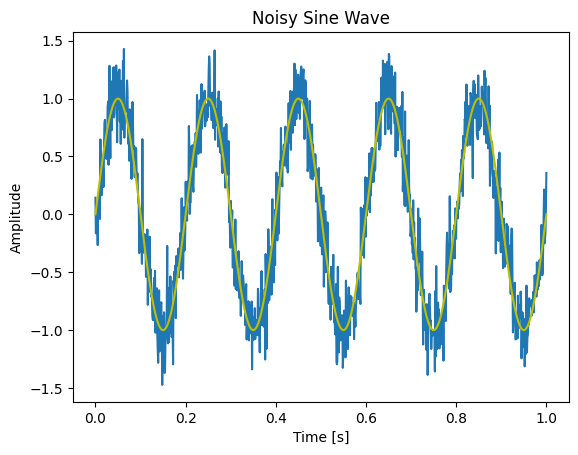

In [20]:
t = np.linspace(0, 1, 1000)
frequency = 5
clean_signal = np.sin(2 * np.pi * frequency * t)

# Signal with noise
noise = np.random.normal(0, 0.2, clean_signal.shape)
x = clean_signal + noise

plt.plot(t, x)
plt.plot(t, clean_signal, 'y')
plt.title('Noisy Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


Input shape: (1000,) Output shape: (1000,)


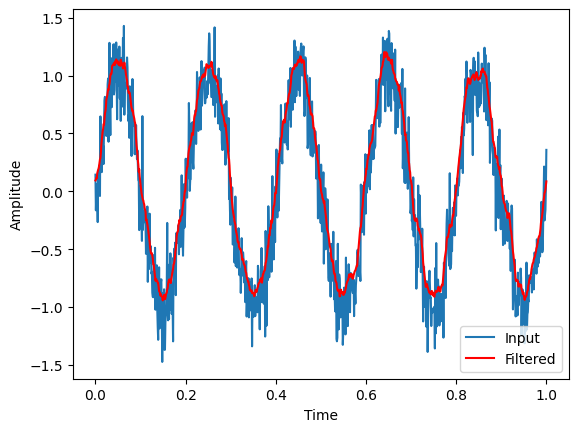

In [21]:
# Reshaping the input for Conv1d layer (samples, channels, timesteps)
X = np.reshape(x, (1, 1, len(x)))
X_tensor = torch.from_numpy(X).float()

kernel_size = 15

w = np.ones((kernel_size), dtype=np.float32) / kernel_size
conv1d = torch.nn.Conv1d(1, 1, kernel_size, padding='same')
conv1d.weight.data = torch.tensor(w).view(1, 1, kernel_size)

# Forward pass for first model
y_tensor = conv1d(X_tensor)
y = y_tensor.detach().numpy().squeeze()
print("Input shape:", x.shape, "Output shape:", y.shape)

plt.plot(t, x, label="Input")
plt.plot(t, y, label="Filtered", color="r")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


Epoch 0, Loss: 0.1187141090631485
Epoch 100, Loss: 0.012749455869197845
Epoch 200, Loss: 0.010120186023414135
Epoch 300, Loss: 0.009955164045095444
Epoch 400, Loss: 0.009951826184988022
Epoch 500, Loss: 0.009951803833246231
Epoch 600, Loss: 0.009951802901923656
Epoch 700, Loss: 0.009951802901923656
Epoch 800, Loss: 0.009951802901923656
Epoch 900, Loss: 0.009951802901923656


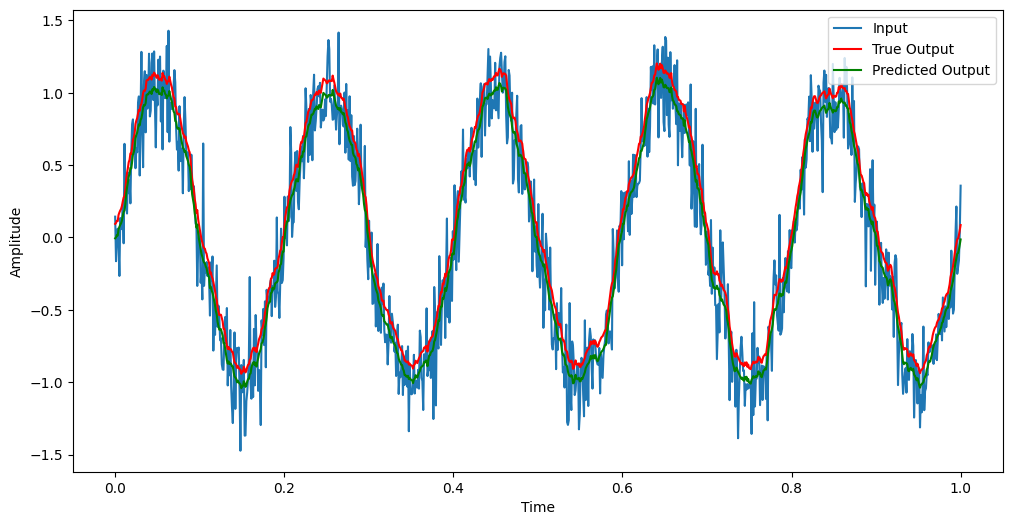

In [30]:
# ---- Model for training ----

conv1d_trainable = torch.nn.Conv1d(1, 1, kernel_size, bias=False, padding='same')

# Define Mean Squared Error (MSE) loss function
criterion = torch.nn.MSELoss()

# Use Adam optimizer for training
optimizer = torch.optim.Adam(conv1d_trainable.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    conv1d_trainable.train()  # Set model to training mode

    # Forward pass: compute the predicted output
    y_hat = conv1d_trainable(X_tensor)

    # Compute the loss between predicted y_hat and the true output y_tensor
    loss = criterion(y_hat, y_tensor)


    optimizer.zero_grad()  # Clear previous gradients
    loss.backward(retain_graph=True)  # Retain graph for multiple backward passes if needed

    # Update weights
    optimizer.step()  # Perform a parameter update

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# ---- Post-Training Analysis ----

conv1d_trainable.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient calculations for evaluation
    y_hat = conv1d_trainable(X_tensor).detach().numpy().squeeze()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, x, label="Input")
plt.plot(t, y, label="True Output", color="r")
plt.plot(t, y_hat, label="Predicted Output", color="g")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [31]:
# Display the learned weights of the trained model
learned_weights = conv1d_trainable.weight.data.numpy().squeeze()
print("Learned Weights:", learned_weights)
print("\nSignal 1/15:", w)

Learned Weights: [0.06690587 0.06696466 0.06742808 0.06678917 0.06623828 0.06584576
 0.06591937 0.06669472 0.06631148 0.06676274 0.06680854 0.06661571
 0.06667095 0.06729978 0.06696755]

Signal 1/15: [0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]
